# IMDB Data Scrapping and Analysis of related features

In [9]:
import requests
import pandas as pd
import numpy as np
from pattern import web
from BeautifulSoup import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
url = 'http://www.imdb.com/search/title?count=100&title_type=feature,tv_series,tv_movie&explore=title_type,genres,year,countries&ref_=nv_ch_mm_1'
r = requests.get(url)

In [11]:
url = 'http://www.imdb.com/search/title?count=100&title_type=feature,tv_series,tv_movie&explore=title_type,genres,year,countries&ref_=nv_ch_mm_1'
# params = dict(sort="num_votes, desc", start=1, title_type="feature", year="1950,2012")
r = requests.get(url)
print r.url

http://www.imdb.com/search/title?count=100&title_type=feature,tv_series,tv_movie&explore=title_type,genres,year,countries&ref_=nv_ch_mm_1


# Extracting useful information from the Html Source code using Pattern               module

In [30]:
dom = web.Element(r.text)
count = 0
for movie in dom.by_tag('td.title'):
    title = movie.by_tag('a')[0].content
    runtime = 0
    if (len(movie.by_tag('span.runtime')) > 0):
        runtime = movie.by_tag('span.runtime')[0].content
    genres = movie.by_tag('span.genre')[0]
    genres = [a.content for a in genres.by_tag('a')]
    if count < 10:
        print "No.", count, ":", title,runtime, genres
    count+=1
#     print title, runtime, genres

No. 0 : Furious 7 137 mins. [u'Action', u'Crime', u'Thriller']
No. 1 : Game of Thrones 55 mins. [u'Adventure', u'Drama', u'Fantasy']
No. 2 : Daredevil 60 mins. [u'Action', u'Sci-Fi']
No. 3 : Avengers: Age of Ultron 142 mins. [u'Action', u'Adventure', u'Sci-Fi', u'Thriller']
No. 4 : Interstellar 169 mins. [u'Adventure', u'Sci-Fi']
No. 5 : Cinderella 105 mins. [u'Drama', u'Family', u'Fantasy', u'Romance']
No. 6 : The Walking Dead 44 mins. [u'Drama', u'Horror']
No. 7 : Insurgent 119 mins. [u'Adventure', u'Sci-Fi', u'Thriller']
No. 8 : Batman v Superman: Dawn of Justice 0 [u'Action', u'Adventure', u'Fantasy', u'Sci-Fi']
No. 9 : True Detective 55 mins. [u'Crime', u'Drama', u'Mystery']


In [13]:
from io import StringIO
movie_text = requests.get('https://raw.github.com/cs109/cs109_data/master/movies.dat').text
movie_file = StringIO(movie_text)
movies = pd.read_csv(movie_file,delimiter='\t')
movies[['id', 'title','imdbID', 'year']].irow(0)

id                1
title     Toy story
imdbID       114709
year           1995
Name: 0, dtype: object

In [32]:
names = ['imdbID', 'title', 'year', 'score', 'votes','runtime', 'genres']
movie_text = requests.get('https://raw.githubusercontent.com/cs109/content/master/imdb_top_10000.txt').text
movie_file = StringIO(movie_text)
data = pd.read_csv(movie_file, delimiter='\t',names=names).dropna()
print data.shape
data.head()

(9999, 7)


,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller


<b>Cleaning/Formatting Data such as removing "mins." String from "runtime" column and removing the year from the Movie title as we already have "Year" column available </b>

In [33]:
item = '142 mins.'
data['runtime'] = [float(item.split(' ')[0]) for item in data.runtime]


In [34]:
data['title'] = [item[0:-7] for item in data.title]
data.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller


In [36]:
genres = set()
for movie in data.genres:
    genres.update(movie.split('|'))
genres = sorted(genres)
# print genres
for genre in genres:
    data[genre] = [genre in movie.split('|') for movie in data.genres]
data.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,...,False,False,False,False,False,True,False,True,False,False


In [37]:
print data.runtime.describe()
print np.sort(data[genres].sum())


count    9999.000000
mean      103.580358
std        26.629310
min         0.000000
25%        93.000000
50%       102.000000
75%       115.000000
max       450.000000
Name: runtime, dtype: float64
[   1    1    9   40  235  260  288  314  358  371  394  512  754  897  916
 1009 1215 1313 1867 1891 2441 2832 3922 5697]


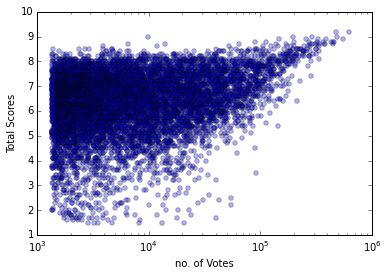

In [47]:
# Correlation between no of votes and scores,
# plt.figure()
# plt.clf()
plt.scatter(data.votes, data.score, alpha=0.3)
plt.xscale('log')
plt.xlabel('no. of Votes')
plt.ylabel('Total Scores')

In [48]:
data[(data.votes > 90000) & (data.score < 5)]

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
317,tt1259571,New Moon,2009,4.5,90457,130,Adventure|Drama|Fantasy|Romance,False,False,True,...,False,False,False,False,True,False,False,False,False,False
334,tt0118688,Batman & Robin,1997,3.5,91875,125,Action|Crime|Fantasy|Sci-Fi,True,False,False,...,False,False,False,False,False,True,False,False,False,False


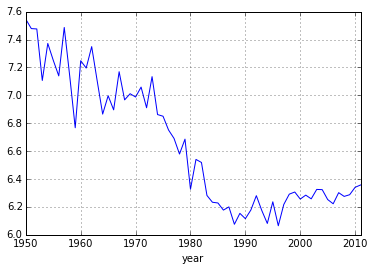

In [49]:
data.score.mean()
data.groupby('year').score.mean().plot()

<b>Finding a movie for every year with highest score</b>

In [50]:
for year, df in data.groupby('year'):
    print year, df[df.score == df.score.max()].title.values

1950 ['Sunset Blvd.']
1951 ['Strangers on a Train']
1952 ["Singin' in the Rain"]
1953 ['The Wages of Fear' 'Tokyo Story']
1954 ['Seven Samurai']
1955 ['Diabolique']
1956 ['The Killing']
1957 ['12 Angry Men']
1958 ['Vertigo']
1959 ['North by Northwest']
1960 ['Psycho']
1961 ['Yojimbo']
1962 ['To Kill a Mockingbird' 'Lawrence of Arabia']
1963 ['The Great Escape' 'High and Low']
1964 ['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb']
1965 ['For a Few Dollars More']
1966 ['The Good, the Bad and the Ugly']
1967 ['Cool Hand Luke']
1968 ['Once Upon a Time in the West']
1969 ['Butch Cassidy and the Sundance Kid' 'Army of Shadows']
1970 ['Patton' 'The Conformist' 'Le Cercle Rouge']
1971 ['A Clockwork Orange']
1972 ['The Godfather']
1973 ['The Sting' 'Scenes from a Marriage']
1974 ['The Godfather: Part II']
1975 ['Outrageous Class']
1976 ['Tosun Pasa']
1977 ['Star Wars: Episode IV - A New Hope']
1978 ['The Girl with the Red Scarf']
1979 ['Apocalypse Now']
1980 ['Star Wars: 

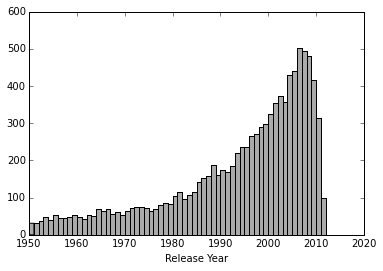

In [51]:
plt.hist(data.year, bins=np.arange(1950,2013), color='#aaaaaa')
plt.xlabel("Release Year")

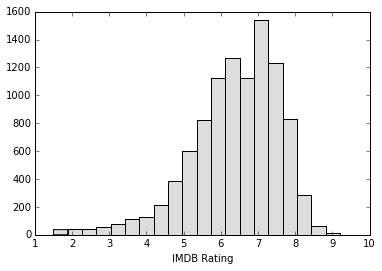

In [52]:
plt.hist(data.score, bins=20, color='#dddddd')
plt.xlabel('IMDB Rating')

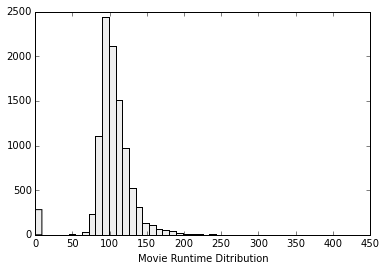

In [53]:
plt.hist(data.runtime, bins=50, color='#eeeeee')
plt.xlabel('Movie Runtime Ditribution')

In [18]:
# All time Lowest rated Movie
data[data.score == data.score.min()][['title', 'year', 'score', 'votes', 'genres']]

,title,year,score,votes,genres
1982,Manos: The Hands of Fate,1966,1.5,20927,Horror
2793,Superbabies: Baby Geniuses 2,2004,1.5,13196,Comedy|Family
3746,Daniel the Wizard,2004,1.5,8271,Comedy|Crime|Family|Fantasy|Horror
5158,Ben & Arthur,2002,1.5,4675,Drama|Romance
5993,Night Train to Mundo Fine,1966,1.5,3542,Action|Adventure|Crime|War
6257,Monster a-Go Go,1965,1.5,3255,Sci-Fi|Horror
6726,Dream Well,2009,1.5,2848,Comedy|Romance|Sport


In [19]:
# Highest Rated Movie
data[data.score == data.score.max()][['title', 'year', 'score', 'votes', 'genres']]

,title,year,score,votes,genres
0,The Shawshank Redemption,1994,9.2,619479,Crime|Drama
26,The Godfather,1972,9.2,474189,Crime|Drama


In [27]:
genre_count = np.sort(data[genres].sum())[::-1]
pd.DataFrame({'Genre Count': genre_count})


,Genre Count
0,5697
1,3922
2,2832
3,2441
4,1891
5,1867
6,1313
7,1215
8,1009
9,916


In [55]:
genre_count = data[genres].sum(axis=1)
print "Average movie has %0.3f genres" % genre_count.mean()
genre_count.describe()

Average movie has 2.754 genres


count    9999.000000
mean        2.753975
std         1.168910
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
dtype: float64